> importing necessary libraries

In [188]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

### Reading data

In [189]:
df = pd.read_csv('/kaggle/input/global-ev-sales-2010-2024/IEA Global EV Data 2024.csv')
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


# exploratory data analysis

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB


In [191]:
df.duplicated().sum()

0

> non-null & duplicate values

### Determining Global EV sales by year

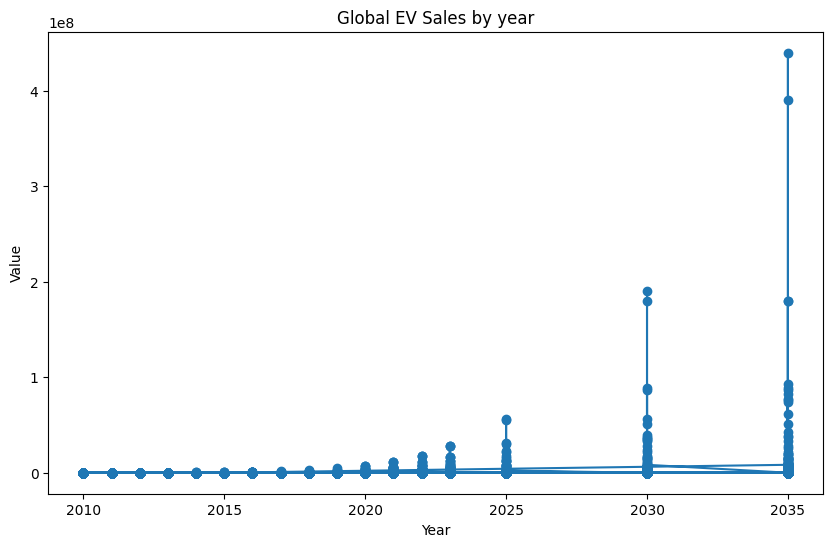

In [192]:
plt.figure(figsize=(10,6))
plt.plot(df['year'], df['value'], marker='o')
plt.title('Global EV Sales by year')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()

### visualization of Global EV Sales by Region and Powertrain Type

In [193]:
df.powertrain.unique()

array(['EV', 'BEV', 'PHEV', 'Publicly available fast',
       'Publicly available slow', 'FCEV'], dtype=object)

In [195]:
filtered_df = df[df['region'] != 'World']
fig = px.bar(filtered_df, 
             x='region', 
             y='value', 
             color='powertrain', 
             title='Global EV Sales by Region and Powertrain Type',
             labels={'value': 'Sales', 'region': 'Region'},
             category_orders={'region': sorted(filtered_df['region'].unique())})

fig.update_layout(xaxis_title='Region', 
                  yaxis_title='Sales', 
                  xaxis_tickangle=-90)
fig.show()

> overall sales of "world" data excluded

### Calculating the amount of powertrain by type
>  converting powertrain type into index number

In [196]:
df['powertrain'].value_counts()

powertrain
EV                         4894
BEV                        3204
PHEV                       2126
FCEV                       1512
Publicly available slow     463
Publicly available fast     455
Name: count, dtype: int64

In [197]:
powertrain_counts = df['powertrain'].value_counts().reset_index()
powertrain_counts

,powertrain,count
0,EV,4894
1,BEV,3204
2,PHEV,2126
3,FCEV,1512
4,Publicly available slow,463
5,Publicly available fast,455


# visualization of most sold powertrain type

In [198]:
fig = px.bar(powertrain_counts, 
             x='powertrain', 
             y='count',
             color='powertrain',
             title='Most Sold Powertrain Type',
             labels={'count': 'Count', 'powertrain': 'Powertrain'})

fig.update_layout(xaxis_title='Powertrain',
                  yaxis_title='Count')

fig.show()

fig = px.bar(df, x = 'parameter', y = 'value', color = 'mode', 
                 title = "Trend of Parameter based on Value")
fig.show()
>heatmap includes the evaluation 

In [214]:
heatmap_data = df.pivot_table(index='parameter', columns='powertrain', values='value', aggfunc='mean')

fig = go.Figure(data=go.Heatmap(
    z=heatmap_data.values,
    x=heatmap_data.columns,
    y=heatmap_data.index,
    colorscale='YlGnBu',
    colorbar=dict(title='Value')))

fig.update_layout(
    title='Heatmap of Values by Parameter and Powertrain',
    xaxis_title='Powertrain',
    yaxis_title='Parameter')

fig.show()

# Summary of Analysis and Visualizations

### Data we gathered from analyzing Global EV sales data

* EV Sales trend over the Years

* Which Region bought the most amount of EV's by the Powertrain type

* the number most sold Powertrain Type

* Heatmap of Values by Parameter and Powertrain type